In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [15]:
df = pd.read_csv(r"E:\Data Science by SRK\Machine_learning\Classification\Gene_data\cleaned_dataset_Gene.csv")

In [16]:
df

,Gene_One,Gene_Two,Cancer_Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2133,5.0,6.5,1
2134,3.4,6.6,0
2135,2.7,6.5,0
2136,3.3,5.6,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138 entries, 0 to 2137
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene_One        2138 non-null   float64
 1   Gene_Two        2138 non-null   float64
 2   Cancer_Present  2138 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 50.2 KB


In [18]:
df['Cancer_Present'].unique()

array([1, 0], dtype=int64)

In [19]:
df['Cancer_Present'].value_counts()

Cancer_Present
0    1076
1    1062
Name: count, dtype: int64

# X and y

In [20]:
X = df.drop('Cancer_Present', axis = 1)
y = df['Cancer_Present']

# Train_Test_Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

# Modelling


**Logistic regression(BaseLine model)**

In [24]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

# Evaluation

**Train**

In [26]:
# Prediction
ypred_train = log_reg.predict(X_train)

# train Accuracy
from sklearn.metrics import accuracy_score
print("Train Accuracy : ", accuracy_score(y_train, ypred_train))

# cross alidation score
from sklearn.model_selection import cross_val_score
print("CV SCORE : ", cross_val_score(log_reg, X_train, y_train, cv = 5, scoring = 'accuracy').mean())


Train Accuracy :  0.8508771929824561
CV SCORE :  0.8497076023391813


**Test**

In [27]:
ypred_test = log_reg.predict(X_test)
print("Test Accuracy : ", accuracy_score(y_test, ypred_test))


Test Accuracy :  0.8177570093457944


# Confusion Metrics

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred_test)
cm

array([[173,  36],
       [ 42, 177]], dtype=int64)

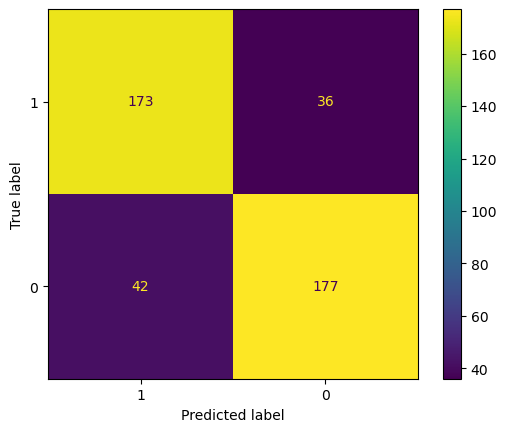

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels = df['Cancer_Present'].unique()).plot()
plt.show()

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       209
           1       0.83      0.81      0.82       219

    accuracy                           0.82       428
   macro avg       0.82      0.82      0.82       428
weighted avg       0.82      0.82      0.82       428



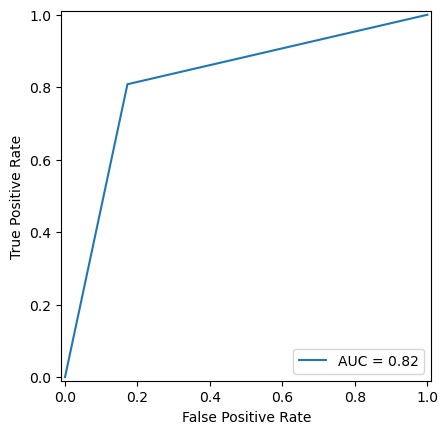

In [33]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fpr, tpr, threshold = roc_curve(y_test, ypred_test)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr = fpr, tpr=tpr, roc_auc= roc_auc).plot()
plt.show()

**AUC SCORE**


In [35]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, ypred_test)

0.8179851871272203